In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import datasets, preprocessing, metrics
# import libraries
import sklearn as sk
import math 
import pprint
from scipy.stats import normaltest
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import sklearn.metrics as sm
# For serialization and deserialization of data from/to file
import pickle

In [48]:
df = pd.read_csv('proffData.csv')
df.head(20)

,amountemployes,beforetaxes
0,1855,65285
1,1464,-146000
2,36,4333
3,1386,1906692
4,2317,2691000
5,20,11
6,2340,754384
7,22150,56771000
8,87,46810
9,59,4469


In [49]:
df1 = pd.read_csv('task2.2.csv')
del df1[df1.columns[0]]
df1.head(20)

,vat,name,address,zipcode,city,protected,phone,email,fax,startdate,employees,industrycode,industrydesc,companycode,companydesc,productionunits,t,version
0,26911745,KMD A/S,Lautrupparken 40,2750,Ballerup,False,44601000.000,info@kmd.dk,44604106.000,03/12 - 2002,1886,620200,Konsulentbistand vedrørende informationsteknologi,60,Aktieselskab,"[{'pno': 1017630322, 'main': False, 'name': 'K...",100,6
1,13594376,"PFA PENSION, FORSIKRINGSAKTIESELSKAB.",Sundkrogsgade 4,2100,København Ø,False,39175000.000,NaN,NaN,16/10 - 1999,1464,651100,Livsforsikring,60,Aktieselskab,"[{'pno': 1000591581, 'main': False, 'name': 'P...",100,6
2,40916458,Dynatest A/S,Tempovej 27,2750,Ballerup,False,70253355.000,NaN,NaN,07/11 - 2019,34,265100,"Fremstilling af udstyr til måling, afprøvning,...",60,Aktieselskab,"[{'pno': 1025210030, 'main': True, 'name': 'Dy...",100,6
3,42334219,OTICON A/S,Kongebakken 9,2765,Smørum,False,39177100.000,NaN,39277900.000,30/12 - 1957,1596,266010,Fremstilling af høreapparater og dele hertil,60,Aktieselskab,"[{'pno': 1006552453, 'main': False, 'name': 'O...",100,6
4,78040017,TOPDANMARK A/S,Borupvang 4,2750,Ballerup,False,70158585.000,NaN,NaN,20/05 - 1985,8,642010,Finansielle holdingselskaber,60,Aktieselskab,"[{'pno': 1015253246, 'main': False, 'name': 'T...",100,6
5,10121361,NORTHTECH ApS,"Wildersgade 51, 1",1408,København K,True,NaN,kontakt@northtech.dk,NaN,20/01 - 2003,19,620100,Computerprogrammering,80,Anpartsselskab,"[{'pno': 1009658463, 'main': True, 'name': 'NO...",100,6
6,14814833,Netcompany A/S,"Grønningen 17, 1",1270,København K,True,70131440.000,info@netcompany.com,NaN,09/01 - 1991,2299,620200,Konsulentbistand vedrørende informationsteknologi,60,Aktieselskab,"[{'pno': 1017633488, 'main': False, 'name': 'N...",100,6
7,24256790,NOVO NORDISK A/S,Novo Alle 1,2880,Bagsværd,False,44448888.000,NaN,NaN,28/11 - 1931,21663,212000,Fremstilling af farmaceutiske præparater,60,Aktieselskab,"[{'pno': 1017661031, 'main': False, 'name': 'N...",100,6
8,29177015,FORMPIPE SOFTWARE A/S,Lautrupvang 1,2750,Ballerup,False,33256555.000,NaN,NaN,14/11 - 2005,86,620100,Computerprogrammering,60,Aktieselskab,"[{'pno': 1014492123, 'main': False, 'name': 'F...",100,6
9,27506488,ALPHA SOLUTIONS A/S,"Gothersgade 14, 4",1123,København K,True,70206538.000,NaN,NaN,01/01 - 2004,60,620200,Konsulentbistand vedrørende informationsteknologi,60,Aktieselskab,"[{'pno': 1010322290, 'main': True, 'name': 'AL...",100,6


In [50]:
final = pd.concat([df1, df], axis=1)

In [51]:
final.head(20)

,vat,name,address,zipcode,city,protected,phone,email,fax,startdate,employees,industrycode,industrydesc,companycode,companydesc,productionunits,t,version,amountemployes,beforetaxes
0,26911745,KMD A/S,Lautrupparken 40,2750,Ballerup,False,44601000.000,info@kmd.dk,44604106.000,03/12 - 2002,1886,620200,Konsulentbistand vedrørende informationsteknologi,60,Aktieselskab,"[{'pno': 1017630322, 'main': False, 'name': 'K...",100,6,1855,65285
1,13594376,"PFA PENSION, FORSIKRINGSAKTIESELSKAB.",Sundkrogsgade 4,2100,København Ø,False,39175000.000,NaN,NaN,16/10 - 1999,1464,651100,Livsforsikring,60,Aktieselskab,"[{'pno': 1000591581, 'main': False, 'name': 'P...",100,6,1464,-146000
2,40916458,Dynatest A/S,Tempovej 27,2750,Ballerup,False,70253355.000,NaN,NaN,07/11 - 2019,34,265100,"Fremstilling af udstyr til måling, afprøvning,...",60,Aktieselskab,"[{'pno': 1025210030, 'main': True, 'name': 'Dy...",100,6,36,4333
3,42334219,OTICON A/S,Kongebakken 9,2765,Smørum,False,39177100.000,NaN,39277900.000,30/12 - 1957,1596,266010,Fremstilling af høreapparater og dele hertil,60,Aktieselskab,"[{'pno': 1006552453, 'main': False, 'name': 'O...",100,6,1386,1906692
4,78040017,TOPDANMARK A/S,Borupvang 4,2750,Ballerup,False,70158585.000,NaN,NaN,20/05 - 1985,8,642010,Finansielle holdingselskaber,60,Aktieselskab,"[{'pno': 1015253246, 'main': False, 'name': 'T...",100,6,2317,2691000
5,10121361,NORTHTECH ApS,"Wildersgade 51, 1",1408,København K,True,NaN,kontakt@northtech.dk,NaN,20/01 - 2003,19,620100,Computerprogrammering,80,Anpartsselskab,"[{'pno': 1009658463, 'main': True, 'name': 'NO...",100,6,20,11
6,14814833,Netcompany A/S,"Grønningen 17, 1",1270,København K,True,70131440.000,info@netcompany.com,NaN,09/01 - 1991,2299,620200,Konsulentbistand vedrørende informationsteknologi,60,Aktieselskab,"[{'pno': 1017633488, 'main': False, 'name': 'N...",100,6,2340,754384
7,24256790,NOVO NORDISK A/S,Novo Alle 1,2880,Bagsværd,False,44448888.000,NaN,NaN,28/11 - 1931,21663,212000,Fremstilling af farmaceutiske præparater,60,Aktieselskab,"[{'pno': 1017661031, 'main': False, 'name': 'N...",100,6,22150,56771000
8,29177015,FORMPIPE SOFTWARE A/S,Lautrupvang 1,2750,Ballerup,False,33256555.000,NaN,NaN,14/11 - 2005,86,620100,Computerprogrammering,60,Aktieselskab,"[{'pno': 1014492123, 'main': False, 'name': 'F...",100,6,87,46810
9,27506488,ALPHA SOLUTIONS A/S,"Gothersgade 14, 4",1123,København K,True,70206538.000,NaN,NaN,01/01 - 2004,60,620200,Konsulentbistand vedrørende informationsteknologi,60,Aktieselskab,"[{'pno': 1010322290, 'main': True, 'name': 'AL...",100,6,59,4469


In [52]:
new_df = final.loc[:, ['name', 'amountemployes','beforetaxes' ]]

In [53]:
new_df

,name,amountemployes,beforetaxes
0,KMD A/S,1855,65285
1,"PFA PENSION, FORSIKRINGSAKTIESELSKAB.",1464,-146000
2,Dynatest A/S,36,4333
3,OTICON A/S,1386,1906692
4,TOPDANMARK A/S,2317,2691000
5,NORTHTECH ApS,20,11
6,Netcompany A/S,2340,754384
7,NOVO NORDISK A/S,22150,56771000
8,FORMPIPE SOFTWARE A/S,87,46810
9,ALPHA SOLUTIONS A/S,59,4469


/Users/markusagnsgaard/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='amountemployes', ylabel='Density'>

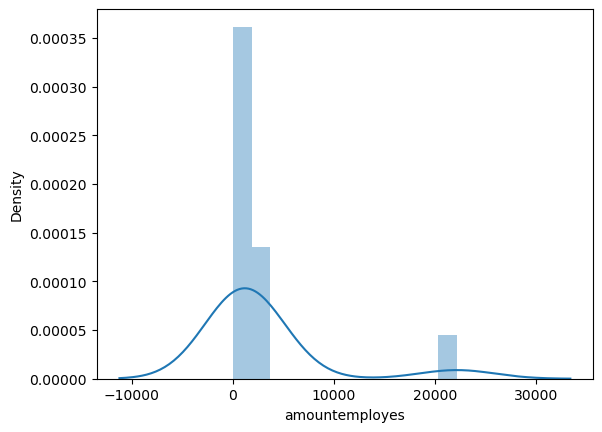

In [54]:
sns.distplot(final['amountemployes'],  label='amountemployes', norm_hist=True)  

In [55]:
corr_matrix = new_df.corr()
corr_matrix

,amountemployes,beforetaxes
amountemployes,1.000,0.982
beforetaxes,0.982,1.000


<AxesSubplot:>

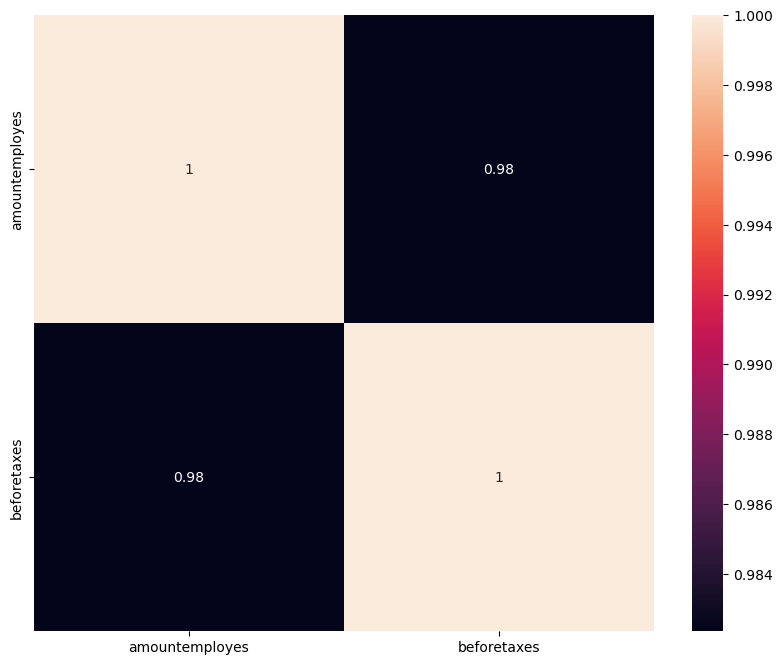

In [56]:
# plot the matrix as a heat map
plt.subplots(figsize = (10, 8))
sns.heatmap(corr_matrix, annot=True)

In [57]:
X = df['amountemployes'].values.reshape(-1, 1)
y = df['beforetaxes'].values.reshape(-1, 1)

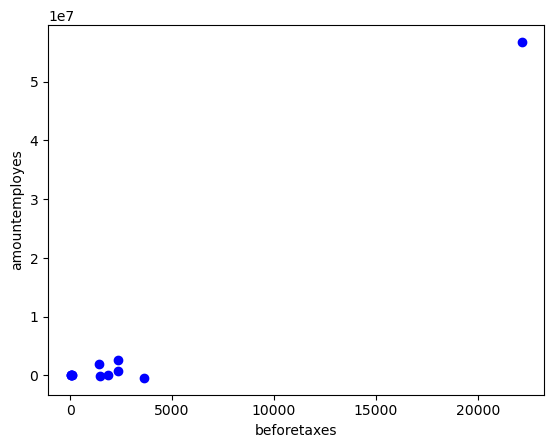

In [58]:
# plot all
plt.ylabel('amountemployes')
plt.xlabel('beforetaxes')
plt.scatter(X, y, color='blue')
plt.show()

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.15) 

In [60]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10, 1)
(10, 1)
(2, 1)
(2, 1)


In [61]:
myreg = LinearRegression()

In [62]:
# fit it to our data
myreg.fit(X_train, y_train)
myreg

LinearRegression()

In [63]:
# get the calculated coefficients
a = myreg.coef_
b = myreg.intercept_

In [64]:
a

array([[2608.41659083]])

In [65]:
b

array([-2588269.64545982])

In [66]:
y_predicted = myreg.predict(X_test)

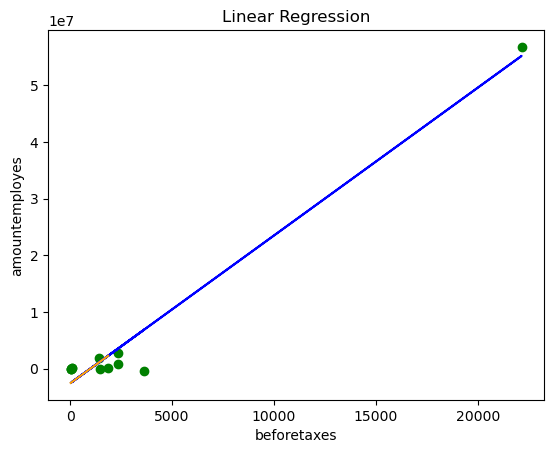

In [67]:
# Visualise the Linear Regression 
plt.title('Linear Regression')
plt.scatter(X, y, color='green')
plt.plot(X_train, a*X_train + b, color='blue')
plt.plot(X_test, y_predicted, color='orange')
plt.xlabel('beforetaxes')
plt.ylabel('amountemployes')
plt.show()

In [68]:
R2 = myreg.score(X, y)
R2

0.965006798745113

In [69]:
# Split X and y
X, y = final.beforetaxes, final.amountemployes

In [70]:
# split the set into subsets for training and testing
from sklearn.model_selection import train_test_split

# default proportion is 75:25
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.15) 

In [71]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10,)
(10,)
(2,)
(2,)


In [72]:
# randomly selected
y_train

4      2317
10       83
1      1464
6      2340
0      1855
7     22150
11     3642
9        59
8        87
5        20
Name: amountemployes, dtype: int64

In [73]:
model = np.polyfit(X_train, y_train, 1)

In [74]:
model

array([3.69076910e-04, 1.19386461e+03])

In [75]:
a, b = model[0], model[1]

In [76]:
test = np.polyfit(X_test, y_test, 1)
test

array([7.09645235e-04, 3.29251072e+01])

In [77]:
a1, b1 = test[0], test[1]

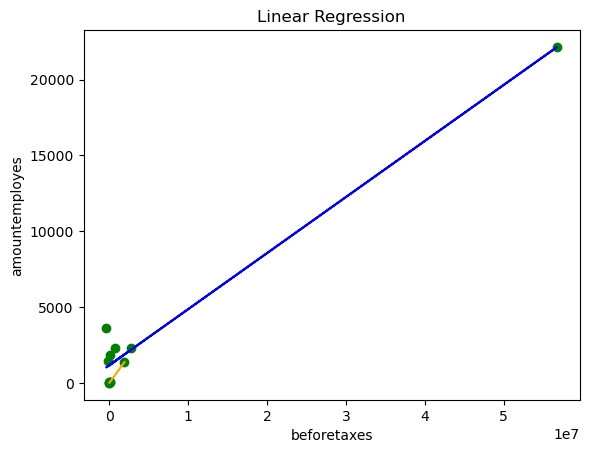

In [82]:
plt.title('Linear Regression')
plt.scatter(X, y, color='green')
plt.plot(X_test, a1*X_test + b1, color='orange')
plt.plot(X_train, a*X_train + b, color='blue')

plt.xlabel('beforetaxes')
plt.ylabel('amountemployes')

plt.show()